<a href="https://colab.research.google.com/github/ddemirel1/Deep-Learning-With-Python/blob/main/imdbClassify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val))



Epoch 1/30
30/30 [==============================] - 3s 70ms/step - loss: 0.5021 - accuracy: 0.7899 - val_loss: 0.3730 - val_accuracy: 0.8724
Epoch 2/30
30/30 [==============================] - 1s 45ms/step - loss: 0.2965 - accuracy: 0.9043 - val_loss: 0.2983 - val_accuracy: 0.8879
Epoch 3/30
30/30 [==============================] - 1s 45ms/step - loss: 0.2149 - accuracy: 0.9283 - val_loss: 0.2950 - val_accuracy: 0.8833
Epoch 4/30
30/30 [==============================] - 1s 46ms/step - loss: 0.1708 - accuracy: 0.9445 - val_loss: 0.2808 - val_accuracy: 0.8867
Epoch 5/30
30/30 [==============================] - 1s 46ms/step - loss: 0.1419 - accuracy: 0.9533 - val_loss: 0.2823 - val_accuracy: 0.8848
Epoch 6/30
30/30 [==============================] - 1s 45ms/step - loss: 0.1130 - accuracy: 0.9659 - val_loss: 0.2954 - val_accuracy: 0.8851
Epoch 7/30
30/30 [==============================] - 1s 44ms/step - loss: 0.0941 - accuracy: 0.9708 - val_loss: 0.3497 - val_accuracy: 0.8759
Epoch 8/30
30

In [8]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

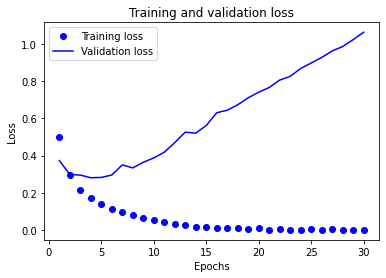

In [5]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


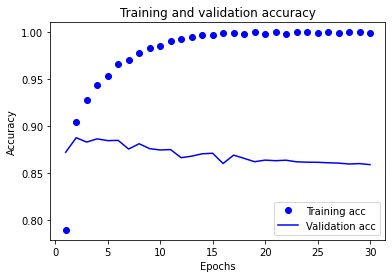

In [6]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 34ms/step - loss: 0.4625 - accuracy: 0.8235
Epoch 2/4
49/49 [==============================] - 2s 35ms/step - loss: 0.2646 - accuracy: 0.9101
Epoch 3/4
49/49 [==============================] - 2s 34ms/step - loss: 0.2048 - accuracy: 0.9258
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2961 - accuracy: 0.8827


In [8]:
model.predict(x_test)

array([[0.13332796],
       [0.99952745],
       [0.74735284],
       ...,
       [0.08782697],
       [0.06907767],
       [0.39793682]], dtype=float32)